In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv(url, delim_whitespace=True, names=column_names)

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
data.duplicated().sum()

0

In [6]:
data['brand'] = data["car_name"].str.extract('(^.*?)\s')
#brands=data["brand"]
#brands=data["brand"].unique().astype('str')
#brands
data["brand"].value_counts()[:10]

brand
ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: count, dtype: int64

In [7]:
data['brand'] = data['brand'].replace(['volkswagen','vokswagen','vw'],'VW')
data['brand'] = data['brand'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
data['brand'] = data['brand'].replace('maxda','mazda')
data['brand'] = data['brand'].replace('toyouta','toyota')
data['brand'] = data['brand'].replace('mercedes','mercedes-benz')
data['brand'] = data['brand'].replace('nissan','datsun')
data['brand'] = data['brand'].replace('capri','ford')
data['brand'] = data['brand'].replace('nissan','datsun')

In [8]:
data[data['brand'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,brand
150,26.0,4,108.0,93.00,2391.0,15.5,74,3,subaru,NaN
346,32.3,4,97.0,67.00,2065.0,17.8,81,3,subaru,NaN


In [9]:
data['brand'].fillna(value = 'subaru',inplace=True) 

In [10]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,brand
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,ford


In [11]:
#data['horsepower'] = data['horsepower'].replace('?', np.nan)
#data = data.dropna()

In [16]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce', downcast='integer')

In [18]:
data=data.fillna(value=data['horsepower'].mean())

In [19]:
print("minimum value: {} \nmaximum value : {}".format(data["horsepower"].min(),data.horsepower.max()))

minimum value: 46.0 
maximum value : 230.0


<Axes: >

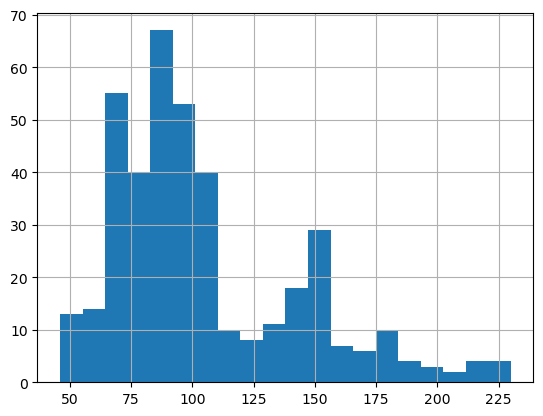

In [20]:
data["horsepower"].hist(bins=20)

In [21]:
data_new = data[['mpg','horsepower']]

In [22]:
data_new.head()

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0


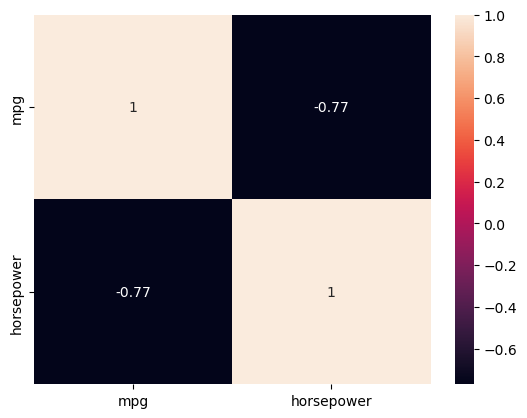

In [24]:
data_new.corr()
viz=sns.heatmap(data_new.corr(),annot=True)

In [43]:
data= data.drop('car_name', axis=1)

In [27]:
y=data_new[['mpg']]
#MPG Column
y[:10]

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
5,15.0
6,14.0
7,14.0
8,14.0
9,15.0


In [53]:
#x=data.drop("mpg", axis=1).values

In [54]:
#x[:10]

array([[8, 307.0, 130, 3504.0, 12.0, 70, 1, 'chevrolet'],
       [8, 350.0, 165, 3693.0, 11.5, 70, 1, 'buick'],
       [8, 318.0, 150, 3436.0, 11.0, 70, 1, 'plymouth'],
       [8, 304.0, 150, 3433.0, 12.0, 70, 1, 'amc'],
       [8, 302.0, 140, 3449.0, 10.5, 70, 1, 'ford'],
       [8, 429.0, 198, 4341.0, 10.0, 70, 1, 'ford'],
       [8, 454.0, 220, 4354.0, 9.0, 70, 1, 'chevrolet'],
       [8, 440.0, 215, 4312.0, 8.5, 70, 1, 'plymouth'],
       [8, 455.0, 225, 4425.0, 10.0, 70, 1, 'pontiac'],
       [8, 390.0, 190, 3850.0, 8.5, 70, 1, 'amc']], dtype=object)

In [47]:
#x.shape

(392, 8)

In [49]:
#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [50]:
#x_test.shape

(118, 8)

In [68]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0,6])],
                    remainder="passthrough")
#x_s=np.array(ct.fit_transform(x))

In [72]:
#x_s[29]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 97.0, 88, 2130.0, 14.5, 1,
       8], dtype=object)

In [71]:
#from sklearn.preprocessing import LabelEncoder
#le_brand=LabelEncoder()
#le_year=LabelEncoder()
#x_s[:,13]=le_brand.fit_transform(x_s[:,13].astype(str))
#x_s[:,12]=le_year.fit_transform(x_s[:,12])
#x_s[:2]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 307.0, 130, 3504.0, 12.0,
        0, 6],
       [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 350.0, 165, 3693.0, 11.5,
        0, 4]], dtype=object)

In [28]:
x=data_new[['horsepower']]

In [30]:
import statsmodels.api as sm

In [31]:
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     582.1
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           9.26e-80
Time:                        09:28:35   Log-Likelihood:                -1202.7
No. Observations:                 398   AIC:                             2409.
Df Residuals:                     396   BIC:                             2417.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0045      0.728     54.978      0.0

In [32]:
from sklearn import linear_model

In [34]:
model_sl = linear_model.LinearRegression(fit_intercept=
True)
x_train = data['horsepower'].values.reshape(-1, 1)
y_train = data['mpg']
model_sl.fit(x_train, y_train)
model_sl.intercept_, model_sl.coef_
model_sl.predict(np.array([98]).reshape(-1, 1))

array([24.53573165])

In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error

In [48]:
y_pred_sl = cross_val_predict(model_sl, x, y, cv=5)  # 5-fold cross-validation
mae_sl = mean_absolute_error(y, y_pred_sl)
print('Mean Absolute Error using Linear Regression: %f' % mae_sl)

Mean Absolute Error using Linear Regression: 4.424426


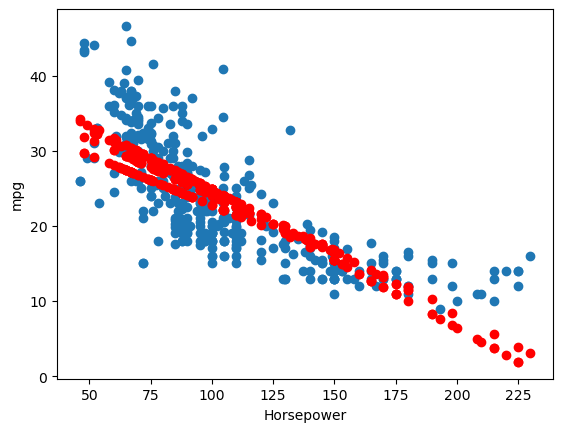

In [51]:
plt.scatter(x_train,y_train, label="actual")
plt.scatter(x_train,y_pred_sl, color='red', label="predicted")
plt.xlabel("Horsepower")
plt.ylabel("mpg")
plt.show()

In [37]:
ypred = results.predict(x)
ypred

0      19.484700
1      13.960135
2      16.327806
3      16.327806
4      17.906253
         ...    
393    26.429868
394    31.796589
395    26.745558
396    27.534782
397    27.061247
Length: 398, dtype: float64

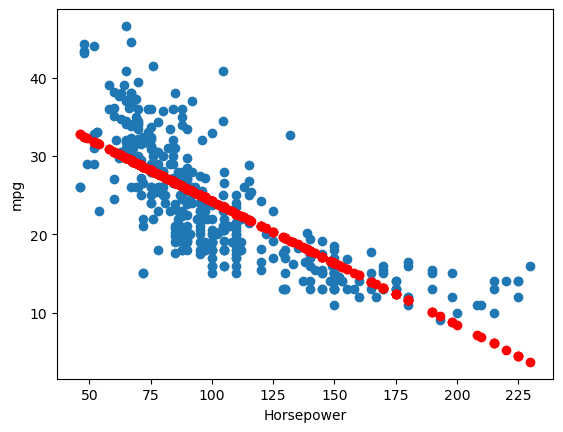

In [38]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,ypred, color='red')
plt.xlabel("Horsepower")
plt.ylabel("mpg")
plt.show()